In [1]:
# Week 1: Install Pytorch and basics:
#conda install pytorch torchvision -c pytorch

In [96]:
import torch
import torchvision
import time

In [4]:
x = torch.Tensor([5,2])
y = torch.Tensor([3,2])

x*y

tensor([15.,  4.])

In [7]:
# Reshape:
x = torch.rand([3,5])
x = x.view([1,15])
x

tensor([[0.1002, 0.4272, 0.5100, 0.7253, 0.3561, 0.5271, 0.5623, 0.7481, 0.5833,
         0.3153, 0.2760, 0.8521, 0.9646, 0.1331, 0.4845]])

In [26]:
# Week 2: Work with data:
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

In [14]:
train = datasets.MNIST("", train = True, download = True, transform  = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train = False, download = True, transform  = transforms.Compose([transforms.ToTensor()]))

In [16]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset  = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [22]:
for t in trainset:
    print(t)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [25]:
x,y = t[0][0],t[1][0]

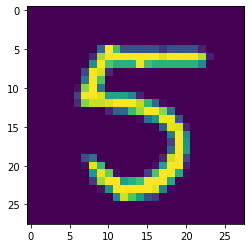

tensor(5)

In [30]:
plt.imshow(x.view(28,28))
plt.show()
y

In [43]:
# Week 3: building the neural network:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [34]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return(F.log_softmax(x, dim = 1))
        

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [42]:
X = x.view(-1,28*28)
net(X)

tensor([[-2.2487, -2.4713, -2.3876, -2.4230, -2.3116, -2.2557, -2.2163, -2.2780,
         -2.2595, -2.2102]], grad_fn=<LogSoftmaxBackward>)

In [44]:
optimizer = optim.Adam(net.parameters(),lr = 0.001)
EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output,y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.7168, grad_fn=<NllLossBackward>)
tensor(0.0198, grad_fn=<NllLossBackward>)
tensor(0.0002, grad_fn=<NllLossBackward>)


In [45]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X,y = data
        output = net(X.view(-1,28*28))
        for idx,i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ",correct/total)

Accuracy:  0.9710166666666666


In [46]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X,y = data
        output = net(X.view(-1,28*28))
        for idx,i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ",correct/total)

Accuracy:  0.9618


In [1]:
# Week 5: CNN using Pytorch:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = False

In [44]:
class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    LABELS = {CATS: 0, DOGS: 1}
    
    training_data = []
    catcount = 0
    dogcount = 0
    
    def make_training_data(self):
        for label in self.LABELS:
            
            print(label)
            for f in tqdm(os.listdir(label)):

                if "jpg" in f:
                    try:
                        path = os.path.join(label,f)
                        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img,(self.IMG_SIZE,self.IMG_SIZE))
                        self.training_data.append([np.array(img),np.eye(2)[self.LABELS[label]]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1
                    except Exception as e:
                        pass
        np.random.shuffle(self.training_data)
        np.save("training_data.npy",self.training_data)
        print("Cats: ",self.catcount)
        print("Dogs: ",self.dogcount)

if REBUILD_DATA:
    dogvcats = DogsVSCats()
    dogvcats.make_training_data()

  0%|          | 58/12501 [00:00<00:21, 579.91it/s]

PetImages/Cat


  0%|          | 21/12501 [00:00<01:00, 205.76it/s]

PetImages/Dog


100%|██████████| 12501/12501 [01:01<00:00, 202.27it/s]


Cats:  12476
Dogs:  12470


In [34]:
training_data = np.load('training_data.npy',allow_pickle= True)

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__() # just run the init of parent class (nn.Module)
        self.conv1 = nn.Conv2d(1, 32, 5) # input is 1 image, 32 output channels, 5x5 kernel / window
        self.conv2 = nn.Conv2d(32, 64, 5) # input is 32, bc the first layer output 32. Then we say the output will be 64 channels, 5x5 kernel / window
        self.conv3 = nn.Conv2d(64, 128, 5)

        x = torch.randn(50,50).view(-1,1,50,50)
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear, 512) #flattening.
        self.fc2 = nn.Linear(512, 2) # 512 in, 2 out bc we're doing 2 classes (dog vs cat).

    def convs(self, x):
        # max pooling over 2x2
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))

        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)  # .view is reshape ... this flattens X before 
        x = F.relu(self.fc1(x))
        x = self.fc2(x) # bc this is our output layer. No activation here.
        return F.softmax(x, dim=1)


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
)


In [39]:
import  torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)
loss_function = nn.MSELoss()

X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

VAL_PCT = 0.1
val_size = int(len(X)*VAL_PCT)
print(val_size)

2494


In [56]:
train_X = X[:-val_size]
train_y = y[:-val_size]

test_X = X[-val_size:]
test_y = y[-val_size:]

print(len(train_X))
print(len(test_X))

22452
2494


In [74]:
def train(net,EPOCHS,BATCH_SIZE):

    # BATCH_SIZE = 100

    # EPOCHS = 1

    for epoch in tqdm(range(EPOCHS)):
        for i in (range(0,len(train_X),BATCH_SIZE)):
            #print(i, i+BATCH_SIZE)
            batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
            batch_y = train_y[i:i+BATCH_SIZE]

            net.zero_grad()
            outputs = net(batch_X)
            loss = loss_function(outputs, batch_y)
            loss.backward()
            optimizer.step()
            #print(loss)

    print(loss)

def test(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for i in (range(len(test_X))):
            real_class = torch.argmax(test_y[i])
            net_out = net(test_X[i].view(-1,1,50,50))
            predicted_class = torch.argmax(net_out)
            if predicted_class == real_class:
                correct += 1
            total += 1
    print("Accurancy ",correct/total)
    return(correct/total)

In [75]:
train(net,5,100)







  0%|          | 0/5 [00:00<?, ?it/s]





 20%|██        | 1/5 [01:42<06:50, 102.74s/it]





 40%|████      | 2/5 [03:24<05:07, 102.44s/it]





 60%|██████    | 3/5 [05:06<03:24, 102.17s/it]





 80%|████████  | 4/5 [06:47<01:41, 101.95s/it]





100%|██████████| 5/5 [08:29<00:00, 101.96s/it]

tensor(0.0046, grad_fn=<MseLossBackward>)


In [76]:
test(net)

Accurancy  0.7538091419406576


0.7538091419406576

In [83]:
def fwd_pass(X,y, train = False):
    if train:
        net.zero_grad()
    outputs = net(X)
    matches = [torch.argmax(i) == torch.argmax(j) for i,j in zip(outputs,y)]
    acc = matches.count(True)/len(matches)
    loss = loss_function(outputs,y)
    
    if train:
        loss.backward()
        optimizer.step()
    return acc, loss

In [84]:
def test(size= 32):
    random_start = np.random.randint(len(test_X) - size)
    X, y = test_X[random_start:(random_start+size)], test_y[random_start:(random_start+size)]
    with torch.no_grad():
        val_acc,val_loss = fwd_pass(X.view(-1,1,50,50),y)
    return val_acc, val_loss



In [102]:
val_acc, val_loss = test(size = 1000)
print(val_acc, val_loss)

0.764 tensor(0.1658)


In [100]:
MODEL_NAME = f"model-{int(time.time())}"

net = Net()
optimizer = optim.Adam(net.parameters(), lr = 0.001)
loss_function = nn.MSELoss()

print(MODEL_NAME)

def train():
    BATCH_SIZE = 100
    EPOCHS = 10
    with open("model.log","a") as f:
        for epoch in range(EPOCHS):
            for i in tqdm(range(0,len(train_X),BATCH_SIZE)):
                batch_X = train_X[i:i+BATCH_SIZE].view(-1,1,50,50)
                batch_y = train_y[i:i+BATCH_SIZE]
                
                acc, loss = fwd_pass(batch_X,batch_y,train = True)
                if i % 50 ==0:
                    val_acc, val_loss = test(size = 100)
                    f.write(f"{MODEL_NAME},{round(time.time(),3)},{round(float(acc),2)},{round(float(loss),4)},{round(float(val_acc),2)},{round(float(val_loss),4)}\n")

model-1589653849


In [101]:
train()







  0%|          | 0/225 [00:00<?, ?it/s]





  0%|          | 1/225 [00:00<02:31,  1.48it/s]





  1%|          | 2/225 [00:01<02:28,  1.50it/s]





  1%|▏         | 3/225 [00:01<02:26,  1.51it/s]





  2%|▏         | 4/225 [00:02<02:24,  1.53it/s]





  2%|▏         | 5/225 [00:03<02:22,  1.54it/s]





  3%|▎         | 6/225 [00:03<02:22,  1.53it/s]





  3%|▎         | 7/225 [00:04<02:21,  1.54it/s]





  4%|▎         | 8/225 [00:05<02:20,  1.55it/s]





  4%|▍         | 9/225 [00:05<02:18,  1.55it/s]





  4%|▍         | 10/225 [00:06<02:18,  1.56it/s]





  5%|▍         | 11/225 [00:07<02:18,  1.55it/s]





  5%|▌         | 12/225 [00:07<02:16,  1.56it/s]





  6%|▌         | 13/225 [00:08<02:15,  1.56it/s]





  6%|▌         | 14/225 [00:09<02:14,  1.57it/s]





  7%|▋         | 15/225 [00:09<02:13,  1.57it/s]





  7%|▋         | 16/225 [00:10<02:13,  1.56it/s]





  8%|▊         | 17/225 [00:10<02:13,  1.56it/s]





  8%|▊         | 18/225 [00:11<02:13,  1

 50%|█████     | 113/225 [01:13<01:12,  1.54it/s]





 51%|█████     | 114/225 [01:14<01:12,  1.54it/s]





 51%|█████     | 115/225 [01:15<01:10,  1.55it/s]





 52%|█████▏    | 116/225 [01:15<01:09,  1.56it/s]





 52%|█████▏    | 117/225 [01:16<01:08,  1.57it/s]





 52%|█████▏    | 118/225 [01:17<01:08,  1.57it/s]





 53%|█████▎    | 119/225 [01:17<01:07,  1.57it/s]





 53%|█████▎    | 120/225 [01:18<01:06,  1.57it/s]





 54%|█████▍    | 121/225 [01:18<01:06,  1.57it/s]





 54%|█████▍    | 122/225 [01:19<01:05,  1.56it/s]





 55%|█████▍    | 123/225 [01:20<01:05,  1.56it/s]





 55%|█████▌    | 124/225 [01:20<01:04,  1.56it/s]





 56%|█████▌    | 125/225 [01:21<01:03,  1.56it/s]





 56%|█████▌    | 126/225 [01:22<01:03,  1.57it/s]





 56%|█████▋    | 127/225 [01:22<01:02,  1.56it/s]





 57%|█████▋    | 128/225 [01:23<01:02,  1.56it/s]





 57%|█████▋    | 129/225 [01:24<01:01,  1.57it/s]





 58%|█████▊    | 130/225 [01:24<01:00,  1.57it/s]





 58%|█████

100%|██████████| 225/225 [02:27<00:00,  1.52it/s]






  0%|          | 0/225 [00:00<?, ?it/s]





  0%|          | 1/225 [00:00<02:24,  1.55it/s]





  1%|          | 2/225 [00:01<02:23,  1.55it/s]





  1%|▏         | 3/225 [00:01<02:22,  1.56it/s]





  2%|▏         | 4/225 [00:02<02:22,  1.56it/s]





  2%|▏         | 5/225 [00:03<02:21,  1.56it/s]





  3%|▎         | 6/225 [00:03<02:20,  1.56it/s]





  3%|▎         | 7/225 [00:04<02:19,  1.57it/s]





  4%|▎         | 8/225 [00:05<02:18,  1.57it/s]





  4%|▍         | 9/225 [00:05<02:18,  1.56it/s]





  4%|▍         | 10/225 [00:06<02:17,  1.57it/s]





  5%|▍         | 11/225 [00:07<02:16,  1.57it/s]





  5%|▌         | 12/225 [00:07<02:15,  1.57it/s]





  6%|▌         | 13/225 [00:08<02:14,  1.58it/s]





  6%|▌         | 14/225 [00:08<02:14,  1.57it/s]





  7%|▋         | 15/225 [00:09<02:13,  1.58it/s]





  7%|▋         | 16/225 [00:10<02:13,  1.57it/s]





  8%|▊         | 17/225 [00:10<02:11,  1.58i

 50%|████▉     | 112/225 [01:11<01:12,  1.57it/s]





 50%|█████     | 113/225 [01:12<01:11,  1.57it/s]





 51%|█████     | 114/225 [01:13<01:10,  1.58it/s]





 51%|█████     | 115/225 [01:13<01:09,  1.58it/s]





 52%|█████▏    | 116/225 [01:14<01:08,  1.58it/s]





 52%|█████▏    | 117/225 [01:15<01:14,  1.46it/s]





 52%|█████▏    | 118/225 [01:15<01:11,  1.49it/s]





 53%|█████▎    | 119/225 [01:16<01:09,  1.52it/s]





 53%|█████▎    | 120/225 [01:17<01:08,  1.54it/s]





 54%|█████▍    | 121/225 [01:17<01:06,  1.56it/s]





 54%|█████▍    | 122/225 [01:18<01:05,  1.57it/s]





 55%|█████▍    | 123/225 [01:18<01:04,  1.58it/s]





 55%|█████▌    | 124/225 [01:19<01:03,  1.58it/s]





 56%|█████▌    | 125/225 [01:20<01:03,  1.58it/s]





 56%|█████▌    | 126/225 [01:20<01:03,  1.55it/s]





 56%|█████▋    | 127/225 [01:21<01:02,  1.56it/s]





 57%|█████▋    | 128/225 [01:22<01:02,  1.56it/s]





 57%|█████▋    | 129/225 [01:22<01:01,  1.56it/s]





 58%|█████

100%|█████████▉| 224/225 [02:22<00:00,  1.59it/s]





100%|██████████| 225/225 [02:23<00:00,  1.57it/s]






  0%|          | 0/225 [00:00<?, ?it/s]





  0%|          | 1/225 [00:00<02:19,  1.60it/s]





  1%|          | 2/225 [00:01<02:19,  1.60it/s]





  1%|▏         | 3/225 [00:01<02:18,  1.60it/s]





  2%|▏         | 4/225 [00:02<02:17,  1.61it/s]





  2%|▏         | 5/225 [00:03<02:16,  1.61it/s]





  3%|▎         | 6/225 [00:03<02:15,  1.61it/s]





  3%|▎         | 7/225 [00:04<02:15,  1.61it/s]





  4%|▎         | 8/225 [00:04<02:14,  1.61it/s]





  4%|▍         | 9/225 [00:05<02:14,  1.61it/s]





  4%|▍         | 10/225 [00:06<02:13,  1.61it/s]





  5%|▍         | 11/225 [00:06<02:12,  1.61it/s]





  5%|▌         | 12/225 [00:07<02:12,  1.61it/s]





  6%|▌         | 13/225 [00:08<02:12,  1.60it/s]





  6%|▌         | 14/225 [00:08<02:11,  1.60it/s]





  7%|▋         | 15/225 [00:09<02:10,  1.60it/s]





  7%|▋         | 16/225 [00:09<02:09,  1.61

 49%|████▉     | 111/225 [01:09<01:11,  1.59it/s]





 50%|████▉     | 112/225 [01:09<01:10,  1.60it/s]





 50%|█████     | 113/225 [01:10<01:10,  1.60it/s]





 51%|█████     | 114/225 [01:11<01:09,  1.60it/s]





 51%|█████     | 115/225 [01:11<01:08,  1.62it/s]





 52%|█████▏    | 116/225 [01:12<01:07,  1.62it/s]





 52%|█████▏    | 117/225 [01:12<01:06,  1.62it/s]





 52%|█████▏    | 118/225 [01:13<01:06,  1.62it/s]





 53%|█████▎    | 119/225 [01:14<01:05,  1.61it/s]





 53%|█████▎    | 120/225 [01:14<01:05,  1.61it/s]





 54%|█████▍    | 121/225 [01:15<01:04,  1.61it/s]





 54%|█████▍    | 122/225 [01:16<01:03,  1.61it/s]





 55%|█████▍    | 123/225 [01:16<01:03,  1.61it/s]





 55%|█████▌    | 124/225 [01:17<01:02,  1.61it/s]





 56%|█████▌    | 125/225 [01:17<01:02,  1.61it/s]





 56%|█████▌    | 126/225 [01:18<01:01,  1.61it/s]





 56%|█████▋    | 127/225 [01:19<01:01,  1.61it/s]





 57%|█████▋    | 128/225 [01:19<01:00,  1.61it/s]





 57%|█████

 99%|█████████▉| 223/225 [02:19<00:01,  1.58it/s]





100%|█████████▉| 224/225 [02:20<00:00,  1.59it/s]





100%|██████████| 225/225 [02:20<00:00,  1.60it/s]






  0%|          | 0/225 [00:00<?, ?it/s]





  0%|          | 1/225 [00:00<02:22,  1.58it/s]





  1%|          | 2/225 [00:01<02:21,  1.58it/s]





  1%|▏         | 3/225 [00:01<02:20,  1.58it/s]





  2%|▏         | 4/225 [00:02<02:19,  1.58it/s]





  2%|▏         | 5/225 [00:03<02:18,  1.59it/s]





  3%|▎         | 6/225 [00:03<02:16,  1.60it/s]





  3%|▎         | 7/225 [00:04<02:15,  1.60it/s]





  4%|▎         | 8/225 [00:05<02:15,  1.60it/s]





  4%|▍         | 9/225 [00:05<02:15,  1.60it/s]





  4%|▍         | 10/225 [00:06<02:14,  1.59it/s]





  5%|▍         | 11/225 [00:06<02:13,  1.60it/s]





  5%|▌         | 12/225 [00:07<02:13,  1.60it/s]





  6%|▌         | 13/225 [00:08<02:12,  1.60it/s]





  6%|▌         | 14/225 [00:08<02:12,  1.59it/s]





  7%|▋         | 15/225 [00:09<02:11,  1.6

 49%|████▉     | 110/225 [01:09<01:13,  1.57it/s]





 49%|████▉     | 111/225 [01:10<01:12,  1.56it/s]





 50%|████▉     | 112/225 [01:10<01:11,  1.57it/s]





 50%|█████     | 113/225 [01:11<01:11,  1.57it/s]





 51%|█████     | 114/225 [01:12<01:10,  1.58it/s]





 51%|█████     | 115/225 [01:12<01:09,  1.57it/s]





 52%|█████▏    | 116/225 [01:13<01:08,  1.58it/s]





 52%|█████▏    | 117/225 [01:13<01:08,  1.58it/s]





 52%|█████▏    | 118/225 [01:14<01:07,  1.58it/s]





 53%|█████▎    | 119/225 [01:15<01:07,  1.57it/s]





 53%|█████▎    | 120/225 [01:15<01:05,  1.59it/s]





 54%|█████▍    | 121/225 [01:16<01:05,  1.59it/s]





 54%|█████▍    | 122/225 [01:17<01:04,  1.58it/s]





 55%|█████▍    | 123/225 [01:17<01:03,  1.60it/s]





 55%|█████▌    | 124/225 [01:18<01:03,  1.58it/s]





 56%|█████▌    | 125/225 [01:18<01:02,  1.59it/s]





 56%|█████▌    | 126/225 [01:19<01:02,  1.60it/s]





 56%|█████▋    | 127/225 [01:20<01:01,  1.60it/s]





 57%|█████

 99%|█████████▊| 222/225 [02:20<00:01,  1.55it/s]





 99%|█████████▉| 223/225 [02:21<00:01,  1.55it/s]





100%|█████████▉| 224/225 [02:21<00:00,  1.57it/s]





100%|██████████| 225/225 [02:22<00:00,  1.58it/s]






  0%|          | 0/225 [00:00<?, ?it/s]





  0%|          | 1/225 [00:00<02:28,  1.51it/s]





  1%|          | 2/225 [00:01<02:31,  1.47it/s]





  1%|▏         | 3/225 [00:02<02:27,  1.51it/s]





  2%|▏         | 4/225 [00:02<02:24,  1.53it/s]





  2%|▏         | 5/225 [00:03<02:23,  1.54it/s]





  3%|▎         | 6/225 [00:03<02:20,  1.56it/s]





  3%|▎         | 7/225 [00:04<02:18,  1.57it/s]





  4%|▎         | 8/225 [00:05<02:17,  1.58it/s]





  4%|▍         | 9/225 [00:05<02:16,  1.58it/s]





  4%|▍         | 10/225 [00:06<02:16,  1.58it/s]





  5%|▍         | 11/225 [00:07<02:14,  1.59it/s]





  5%|▌         | 12/225 [00:07<02:13,  1.60it/s]





  6%|▌         | 13/225 [00:08<02:13,  1.59it/s]





  6%|▌         | 14/225 [00:08<02:12,  1.

 48%|████▊     | 109/225 [01:08<01:13,  1.58it/s]





 49%|████▉     | 110/225 [01:09<01:12,  1.59it/s]





 49%|████▉     | 111/225 [01:09<01:11,  1.59it/s]





 50%|████▉     | 112/225 [01:10<01:10,  1.60it/s]





 50%|█████     | 113/225 [01:11<01:10,  1.60it/s]





 51%|█████     | 114/225 [01:11<01:09,  1.60it/s]





 51%|█████     | 115/225 [01:12<01:08,  1.59it/s]





 52%|█████▏    | 116/225 [01:12<01:08,  1.60it/s]





 52%|█████▏    | 117/225 [01:13<01:07,  1.60it/s]





 52%|█████▏    | 118/225 [01:14<01:06,  1.61it/s]





 53%|█████▎    | 119/225 [01:14<01:06,  1.61it/s]





 53%|█████▎    | 120/225 [01:15<01:05,  1.61it/s]





 54%|█████▍    | 121/225 [01:16<01:04,  1.60it/s]





 54%|█████▍    | 122/225 [01:16<01:04,  1.60it/s]





 55%|█████▍    | 123/225 [01:17<01:03,  1.61it/s]





 55%|█████▌    | 124/225 [01:17<01:02,  1.61it/s]





 56%|█████▌    | 125/225 [01:18<01:02,  1.59it/s]





 56%|█████▌    | 126/225 [01:19<01:02,  1.60it/s]





 56%|█████

 98%|█████████▊| 221/225 [02:18<00:02,  1.58it/s]





 99%|█████████▊| 222/225 [02:19<00:01,  1.59it/s]





 99%|█████████▉| 223/225 [02:20<00:01,  1.59it/s]





100%|█████████▉| 224/225 [02:20<00:00,  1.60it/s]





100%|██████████| 225/225 [02:21<00:00,  1.59it/s]






  0%|          | 0/225 [00:00<?, ?it/s]





  0%|          | 1/225 [00:00<02:18,  1.61it/s]





  1%|          | 2/225 [00:01<02:18,  1.61it/s]





  1%|▏         | 3/225 [00:01<02:18,  1.61it/s]





  2%|▏         | 4/225 [00:02<02:17,  1.61it/s]





  2%|▏         | 5/225 [00:03<02:16,  1.61it/s]





  3%|▎         | 6/225 [00:03<02:16,  1.61it/s]





  3%|▎         | 7/225 [00:04<02:15,  1.61it/s]





  4%|▎         | 8/225 [00:04<02:14,  1.61it/s]





  4%|▍         | 9/225 [00:05<02:16,  1.59it/s]





  4%|▍         | 10/225 [00:06<02:14,  1.60it/s]





  5%|▍         | 11/225 [00:06<02:12,  1.61it/s]





  5%|▌         | 12/225 [00:07<02:11,  1.61it/s]





  6%|▌         | 13/225 [00:08<02:11,  1

 48%|████▊     | 108/225 [01:07<01:13,  1.59it/s]





 48%|████▊     | 109/225 [01:08<01:13,  1.59it/s]





 49%|████▉     | 110/225 [01:08<01:12,  1.59it/s]





 49%|████▉     | 111/225 [01:09<01:11,  1.60it/s]





 50%|████▉     | 112/225 [01:09<01:10,  1.60it/s]





 50%|█████     | 113/225 [01:10<01:09,  1.60it/s]





 51%|█████     | 114/225 [01:11<01:09,  1.60it/s]





 51%|█████     | 115/225 [01:11<01:08,  1.61it/s]





 52%|█████▏    | 116/225 [01:12<01:07,  1.61it/s]





 52%|█████▏    | 117/225 [01:12<01:06,  1.62it/s]





 52%|█████▏    | 118/225 [01:13<01:06,  1.61it/s]





 53%|█████▎    | 119/225 [01:14<01:05,  1.61it/s]





 53%|█████▎    | 120/225 [01:14<01:05,  1.60it/s]





 54%|█████▍    | 121/225 [01:15<01:05,  1.60it/s]





 54%|█████▍    | 122/225 [01:16<01:04,  1.61it/s]





 55%|█████▍    | 123/225 [01:16<01:03,  1.61it/s]





 55%|█████▌    | 124/225 [01:17<01:03,  1.60it/s]





 56%|█████▌    | 125/225 [01:17<01:02,  1.61it/s]





 56%|█████

 98%|█████████▊| 220/225 [02:18<00:03,  1.53it/s]





 98%|█████████▊| 221/225 [02:18<00:02,  1.53it/s]





 99%|█████████▊| 222/225 [02:19<00:01,  1.54it/s]





 99%|█████████▉| 223/225 [02:20<00:01,  1.54it/s]





100%|█████████▉| 224/225 [02:20<00:00,  1.55it/s]





100%|██████████| 225/225 [02:21<00:00,  1.59it/s]






  0%|          | 0/225 [00:00<?, ?it/s]





  0%|          | 1/225 [00:00<02:25,  1.54it/s]





  1%|          | 2/225 [00:01<02:26,  1.52it/s]





  1%|▏         | 3/225 [00:01<02:25,  1.52it/s]





  2%|▏         | 4/225 [00:02<02:24,  1.53it/s]





  2%|▏         | 5/225 [00:03<02:23,  1.54it/s]





  3%|▎         | 6/225 [00:03<02:22,  1.54it/s]





  3%|▎         | 7/225 [00:04<02:21,  1.55it/s]





  4%|▎         | 8/225 [00:05<02:19,  1.55it/s]





  4%|▍         | 9/225 [00:05<02:19,  1.55it/s]





  4%|▍         | 10/225 [00:06<02:17,  1.56it/s]





  5%|▍         | 11/225 [00:07<02:15,  1.58it/s]





  5%|▌         | 12/225 [00:07<02:14,  

 48%|████▊     | 107/225 [01:07<01:14,  1.58it/s]





 48%|████▊     | 108/225 [01:07<01:13,  1.58it/s]





 48%|████▊     | 109/225 [01:08<01:12,  1.59it/s]





 49%|████▉     | 110/225 [01:09<01:13,  1.57it/s]





 49%|████▉     | 111/225 [01:09<01:12,  1.57it/s]





 50%|████▉     | 112/225 [01:10<01:11,  1.59it/s]





 50%|█████     | 113/225 [01:11<01:10,  1.59it/s]





 51%|█████     | 114/225 [01:11<01:09,  1.59it/s]





 51%|█████     | 115/225 [01:12<01:09,  1.59it/s]





 52%|█████▏    | 116/225 [01:12<01:08,  1.59it/s]





 52%|█████▏    | 117/225 [01:13<01:08,  1.59it/s]





 52%|█████▏    | 118/225 [01:14<01:07,  1.59it/s]





 53%|█████▎    | 119/225 [01:14<01:06,  1.59it/s]





 53%|█████▎    | 120/225 [01:15<01:05,  1.61it/s]





 54%|█████▍    | 121/225 [01:16<01:04,  1.61it/s]





 54%|█████▍    | 122/225 [01:16<01:03,  1.61it/s]





 55%|█████▍    | 123/225 [01:17<01:03,  1.61it/s]





 55%|█████▌    | 124/225 [01:17<01:02,  1.61it/s]





 56%|█████

 97%|█████████▋| 219/225 [02:17<00:03,  1.60it/s]





 98%|█████████▊| 220/225 [02:18<00:03,  1.59it/s]





 98%|█████████▊| 221/225 [02:18<00:02,  1.60it/s]





 99%|█████████▊| 222/225 [02:19<00:01,  1.60it/s]





 99%|█████████▉| 223/225 [02:19<00:01,  1.62it/s]





100%|█████████▉| 224/225 [02:20<00:00,  1.61it/s]





100%|██████████| 225/225 [02:20<00:00,  1.60it/s]






  0%|          | 0/225 [00:00<?, ?it/s]





  0%|          | 1/225 [00:00<02:20,  1.60it/s]





  1%|          | 2/225 [00:01<02:18,  1.61it/s]





  1%|▏         | 3/225 [00:01<02:18,  1.60it/s]





  2%|▏         | 4/225 [00:02<02:17,  1.61it/s]





  2%|▏         | 5/225 [00:03<02:16,  1.62it/s]





  3%|▎         | 6/225 [00:03<02:15,  1.62it/s]





  3%|▎         | 7/225 [00:04<02:15,  1.61it/s]





  4%|▎         | 8/225 [00:04<02:14,  1.61it/s]





  4%|▍         | 9/225 [00:05<02:13,  1.61it/s]





  4%|▍         | 10/225 [00:06<02:13,  1.61it/s]





  5%|▍         | 11/225 [00:06<02:12, 

 47%|████▋     | 106/225 [01:07<01:14,  1.60it/s]





 48%|████▊     | 107/225 [01:07<01:13,  1.60it/s]





 48%|████▊     | 108/225 [01:08<01:13,  1.60it/s]





 48%|████▊     | 109/225 [01:09<01:12,  1.60it/s]





 49%|████▉     | 110/225 [01:09<01:11,  1.60it/s]





 49%|████▉     | 111/225 [01:10<01:10,  1.61it/s]





 50%|████▉     | 112/225 [01:10<01:10,  1.61it/s]





 50%|█████     | 113/225 [01:11<01:10,  1.58it/s]





 51%|█████     | 114/225 [01:12<01:09,  1.59it/s]





 51%|█████     | 115/225 [01:12<01:08,  1.60it/s]





 52%|█████▏    | 116/225 [01:13<01:08,  1.59it/s]





 52%|█████▏    | 117/225 [01:14<01:07,  1.59it/s]





 52%|█████▏    | 118/225 [01:14<01:07,  1.60it/s]





 53%|█████▎    | 119/225 [01:15<01:05,  1.61it/s]





 53%|█████▎    | 120/225 [01:15<01:05,  1.61it/s]





 54%|█████▍    | 121/225 [01:16<01:04,  1.62it/s]





 54%|█████▍    | 122/225 [01:17<01:03,  1.61it/s]





 55%|█████▍    | 123/225 [01:17<01:03,  1.61it/s]





 55%|█████

 97%|█████████▋| 218/225 [02:17<00:04,  1.60it/s]





 97%|█████████▋| 219/225 [02:17<00:03,  1.60it/s]





 98%|█████████▊| 220/225 [02:18<00:03,  1.59it/s]





 98%|█████████▊| 221/225 [02:19<00:02,  1.60it/s]





 99%|█████████▊| 222/225 [02:19<00:01,  1.60it/s]





 99%|█████████▉| 223/225 [02:20<00:01,  1.61it/s]





100%|█████████▉| 224/225 [02:20<00:00,  1.60it/s]





100%|██████████| 225/225 [02:21<00:00,  1.59it/s]






  0%|          | 0/225 [00:00<?, ?it/s]





  0%|          | 1/225 [00:00<02:17,  1.63it/s]





  1%|          | 2/225 [00:01<02:17,  1.63it/s]





  1%|▏         | 3/225 [00:01<02:16,  1.62it/s]





  2%|▏         | 4/225 [00:02<02:16,  1.62it/s]





  2%|▏         | 5/225 [00:03<02:16,  1.61it/s]





  3%|▎         | 6/225 [00:03<02:15,  1.62it/s]





  3%|▎         | 7/225 [00:04<02:14,  1.62it/s]





  4%|▎         | 8/225 [00:04<02:14,  1.61it/s]





  4%|▍         | 9/225 [00:05<02:14,  1.61it/s]





  4%|▍         | 10/225 [00:06<02:15,

 47%|████▋     | 105/225 [01:06<01:15,  1.60it/s]





 47%|████▋     | 106/225 [01:07<01:14,  1.60it/s]





 48%|████▊     | 107/225 [01:07<01:13,  1.61it/s]





 48%|████▊     | 108/225 [01:08<01:12,  1.62it/s]





 48%|████▊     | 109/225 [01:08<01:12,  1.61it/s]





 49%|████▉     | 110/225 [01:09<01:10,  1.62it/s]





 49%|████▉     | 111/225 [01:10<01:10,  1.61it/s]





 50%|████▉     | 112/225 [01:10<01:10,  1.61it/s]





 50%|█████     | 113/225 [01:11<01:09,  1.61it/s]





 51%|█████     | 114/225 [01:12<01:09,  1.61it/s]





 51%|█████     | 115/225 [01:12<01:08,  1.61it/s]





 52%|█████▏    | 116/225 [01:13<01:07,  1.61it/s]





 52%|█████▏    | 117/225 [01:13<01:06,  1.62it/s]





 52%|█████▏    | 118/225 [01:14<01:05,  1.62it/s]





 53%|█████▎    | 119/225 [01:15<01:05,  1.61it/s]





 53%|█████▎    | 120/225 [01:15<01:05,  1.61it/s]





 54%|█████▍    | 121/225 [01:16<01:04,  1.61it/s]





 54%|█████▍    | 122/225 [01:17<01:04,  1.61it/s]





 55%|█████

 96%|█████████▋| 217/225 [02:16<00:04,  1.60it/s]





 97%|█████████▋| 218/225 [02:16<00:04,  1.59it/s]





 97%|█████████▋| 219/225 [02:17<00:03,  1.60it/s]





 98%|█████████▊| 220/225 [02:18<00:03,  1.60it/s]





 98%|█████████▊| 221/225 [02:18<00:02,  1.60it/s]





 99%|█████████▊| 222/225 [02:19<00:01,  1.61it/s]





 99%|█████████▉| 223/225 [02:20<00:01,  1.62it/s]





100%|█████████▉| 224/225 [02:20<00:00,  1.62it/s]





100%|██████████| 225/225 [02:21<00:00,  1.60it/s]






  0%|          | 0/225 [00:00<?, ?it/s]





  0%|          | 1/225 [00:00<02:23,  1.56it/s]





  1%|          | 2/225 [00:01<02:21,  1.58it/s]





  1%|▏         | 3/225 [00:01<02:19,  1.59it/s]





  2%|▏         | 4/225 [00:02<02:18,  1.59it/s]





  2%|▏         | 5/225 [00:03<02:17,  1.60it/s]





  3%|▎         | 6/225 [00:03<02:16,  1.61it/s]





  3%|▎         | 7/225 [00:04<02:15,  1.60it/s]





  4%|▎         | 8/225 [00:04<02:14,  1.61it/s]





  4%|▍         | 9/225 [00:05<02:14

 46%|████▌     | 104/225 [01:04<01:15,  1.61it/s]





 47%|████▋     | 105/225 [01:05<01:14,  1.60it/s]





 47%|████▋     | 106/225 [01:06<01:14,  1.60it/s]





 48%|████▊     | 107/225 [01:06<01:13,  1.61it/s]





 48%|████▊     | 108/225 [01:07<01:13,  1.60it/s]





 48%|████▊     | 109/225 [01:07<01:12,  1.60it/s]





 49%|████▉     | 110/225 [01:08<01:11,  1.61it/s]





 49%|████▉     | 111/225 [01:09<01:10,  1.62it/s]





 50%|████▉     | 112/225 [01:09<01:09,  1.62it/s]





 50%|█████     | 113/225 [01:10<01:09,  1.62it/s]





 51%|█████     | 114/225 [01:10<01:08,  1.61it/s]





 51%|█████     | 115/225 [01:11<01:08,  1.61it/s]





 52%|█████▏    | 116/225 [01:12<01:07,  1.61it/s]





 52%|█████▏    | 117/225 [01:12<01:06,  1.62it/s]





 52%|█████▏    | 118/225 [01:13<01:06,  1.62it/s]





 53%|█████▎    | 119/225 [01:14<01:05,  1.62it/s]





 53%|█████▎    | 120/225 [01:14<01:04,  1.63it/s]





 54%|█████▍    | 121/225 [01:15<01:04,  1.62it/s]





 54%|█████

 96%|█████████▌| 216/225 [02:16<00:05,  1.60it/s]





 96%|█████████▋| 217/225 [02:17<00:05,  1.60it/s]





 97%|█████████▋| 218/225 [02:17<00:04,  1.61it/s]





 97%|█████████▋| 219/225 [02:18<00:03,  1.59it/s]





 98%|█████████▊| 220/225 [02:19<00:03,  1.59it/s]





 98%|█████████▊| 221/225 [02:19<00:02,  1.61it/s]





 99%|█████████▊| 222/225 [02:20<00:01,  1.62it/s]





 99%|█████████▉| 223/225 [02:21<00:01,  1.62it/s]





100%|█████████▉| 224/225 [02:21<00:00,  1.62it/s]





100%|██████████| 225/225 [02:22<00:00,  1.58it/s]
